In [280]:
import numpy as np # linear algebra
import pandas as pd # data processing

# warning filter
import warnings
warnings.filterwarnings('ignore')

import sqlalchemy # sql connection

#To Traceback error
import traceback

# For calculating Time required to run the model
import time

from tqdm import tqdm

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder    # Used when you want to provide dictionary    

#train test split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Scaling Down
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Imputation
from sklearn.impute import KNNImputer

#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import roc_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE

In [281]:
pip install Datapreprocessing

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Datapreprocessing (from versions: none)
ERROR: No matching distribution found for Datapreprocessing


In [282]:
# #Use for Handaling Outliers
# from learn.processing import DataPreProcessing

# # For All Regressor Models
# from learn.supervised import Regressor

In [283]:
model_details = []
Testing_accuracy = []
Training_accuracy = []
Testing_Recall = []
Testing_Precision = []
Testing_F1_Score = []

In [284]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [285]:
#Checking Duplicates
df.duplicated().sum()

0

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [287]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### 1. Invoice ID

In [288]:
df['Invoice ID'].value_counts()

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64

In [289]:
df.drop(columns=['Invoice ID'],axis=1,inplace=True)

### 2. Branch

In [290]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [291]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['Branch']])

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [292]:
One_hot_encoder.categories_[0]

array(['A', 'B', 'C'], dtype=object)

In [293]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['Branch']]))
df1.columns= list(map(lambda x:'Branch_'+x,One_hot_encoder.categories_[0].tolist()))

In [294]:
df = pd.concat([df,df1],axis=1)

In [295]:
df.drop(columns=['Branch'],inplace=True)

### 3. City

In [296]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [297]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['City']])

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [298]:
One_hot_encoder.categories_[0]

array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)

In [299]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['City']]))
df1.columns= list(map(lambda x:'City_'+x,One_hot_encoder.categories_[0].tolist()))

In [300]:
df = pd.concat([df,df1],axis=1)

In [301]:
df.drop(columns=['City'],inplace=True)

### 4. Customer type

In [302]:
df['Customer type'].value_counts()
df["Customer_type"] = df['Customer type']
df.drop(['Customer type'],axis=1,inplace=True)

In [303]:
values_Customer_type =  {'Normal': 0, 'Member': 1}

In [304]:
mapping = [{
    'col': 'Customer_type',
    'mapping': values_Customer_type
}]

In [305]:
encoder = OrdinalEncoder(cols=['Customer_type'], mapping=mapping)
df['Customer_type'] = encoder.fit_transform(df['Customer_type'])

In [306]:
values_Customer_type

{'Normal': 0, 'Member': 1}

# Unit Price 

<AxesSubplot:>

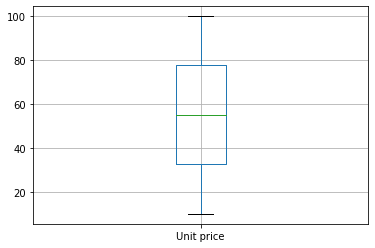

In [307]:
df[["Unit price"]].boxplot()

In [308]:
df["Unit_price"] = df["Unit price"]
df.drop(columns=["Unit price"],axis=1,inplace=True)

# Tax 5%

In [309]:
df["Tax_5"] = df["Tax 5%"]
df.drop(columns=["Tax 5%"],axis=1,inplace=True)

# gross income

In [310]:
df["gross income"]
df["gross_income"] = df["gross income"]
df.drop(columns=["gross income"],axis=1,inplace=True)

### 5. Gender

In [311]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [312]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [313]:
values_Gender = dict(zip(list(encoder.classes_),list(range(len(encoder.classes_)))))
values_Gender

{'Female': 0, 'Male': 1}

### 6. Product line

In [314]:
df['Product line'].value_counts()
df["Product_line"] = df['Product line']
df.drop(['Product line'],axis=1,inplace=True)

In [315]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['Product_line']])

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [316]:
One_hot_encoder.categories_[0]

array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)

In [317]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['Product_line']]))
df1.columns= list(map(lambda x:'Product_line_'+x,One_hot_encoder.categories_[0].tolist()))

In [318]:
df = pd.concat([df,df1],axis=1)

In [319]:
df.drop(columns=['Product_line'],inplace=True)

### 7. Date and Time

In [320]:
df.drop(columns=['Date','Time'],inplace=True)

### 8. Payment

In [321]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [322]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['Payment']])

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [323]:
One_hot_encoder.categories_[0]

array(['Cash', 'Credit card', 'Ewallet'], dtype=object)

In [324]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['Payment']]))
df1.columns= list(map(lambda x:'Payment_'+x,One_hot_encoder.categories_[0].tolist()))

In [325]:
df = pd.concat([df,df1],axis=1)

In [326]:
df.drop(columns=['Payment'],inplace=True)

### 9. gross margin percentage

In [327]:
df['gross margin percentage'].value_counts()


4.761905    1000
Name: gross margin percentage, dtype: int64

In [328]:
df.drop(columns=['gross margin percentage'],inplace=True)

In [329]:
df

,Gender,Quantity,Total,cogs,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,...,gross_income,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0,7,548.9715,522.83,9.1,1,0,0,0,0,...,26.1415,0,0,0,1,0,0,0,0,1
1,0,5,80.2200,76.40,9.6,0,0,1,0,1,...,3.8200,1,0,0,0,0,0,1,0,0
2,1,7,340.5255,324.31,7.4,1,0,0,0,0,...,16.2155,0,0,0,0,1,0,0,1,0
3,1,8,489.0480,465.76,8.4,1,0,0,0,0,...,23.2880,0,0,0,1,0,0,0,0,1
4,1,7,634.3785,604.17,5.3,1,0,0,0,0,...,30.2085,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,42.3675,40.35,6.2,0,0,1,0,1,...,2.0175,0,0,0,1,0,0,0,0,1
996,0,10,1022.4900,973.80,4.4,0,1,0,1,0,...,48.6900,0,0,0,0,1,0,0,0,1
997,1,1,33.4320,31.84,7.7,1,0,0,0,0,...,1.5920,0,0,1,0,0,0,1,0,0
998,1,1,69.1110,65.82,4.1,1,0,0,0,0,...,3.2910,0,0,0,0,1,0,1,0,0


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               1000 non-null   int32  
 1   Quantity                             1000 non-null   int64  
 2   Total                                1000 non-null   float64
 3   cogs                                 1000 non-null   float64
 4   Rating                               1000 non-null   float64
 5   Branch_A                             1000 non-null   int32  
 6   Branch_B                             1000 non-null   int32  
 7   Branch_C                             1000 non-null   int32  
 8   City_Mandalay                        1000 non-null   int32  
 9   City_Naypyitaw                       1000 non-null   int32  
 10  City_Yangon                          1000 non-null   int32  
 11  Customer_type                  

In [331]:
df.columns

Index(['Gender', 'Quantity', 'Total', 'cogs', 'Rating', 'Branch_A', 'Branch_B',
       'Branch_C', 'City_Mandalay', 'City_Naypyitaw', 'City_Yangon',
       'Customer_type', 'Unit_price', 'Tax_5', 'gross_income',
       'Product_line_Electronic accessories',
       'Product_line_Fashion accessories', 'Product_line_Food and beverages',
       'Product_line_Health and beauty', 'Product_line_Home and lifestyle',
       'Product_line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

# Classification

In [332]:
# df['Rating'] = df['Rating'].apply(lambda x : 1 if x > 5 else 0)
# df['Rating'].value_counts()

# Binning

In [333]:
min_val = int(df['Rating'].min())
min_val

max_val = int(df['Rating'].max())
max_val

cut_points = [5]

break_points = [min_val] + cut_points + [max_val]
break_points

[4, 5, 10]

In [334]:
df['Rating'] = pd.cut(df['Rating'], bins=break_points, labels=['Not Satisfied','Satisfied'], include_lowest=True)

In [335]:
df['Rating'].value_counts()

Satisfied        826
Not Satisfied    174
Name: Rating, dtype: int64

In [336]:
encoder = LabelEncoder()
df['Rating'] = encoder.fit_transform(df['Rating'])

In [337]:
values_Rating = dict(zip(list(encoder.classes_),list(range(len(encoder.classes_)))))
values_Rating

{'Not Satisfied': 0, 'Satisfied': 1}

# SMOTE

In [338]:
target_column = "Rating"

In [339]:
x = df.drop(target_column,axis=1)
y = df[target_column]

In [340]:
from imblearn.over_sampling import SMOTE
# df.info()

In [341]:
sm = SMOTE(random_state=5)
x, y = sm.fit_resample(x,y)

In [342]:
x.shape

(1652, 23)

In [343]:
x.duplicated().sum()

0

In [344]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)

x_train

,Gender,Quantity,Total,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,gross_income,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
156,1,1,75.778500,72.170000,0,1,0,1,0,0,...,3.608500,1,0,0,0,0,0,1,0,0
326,1,5,523.845000,498.900000,1,0,0,0,0,1,...,24.945000,0,0,1,0,0,0,1,0,0
1519,0,7,530.127084,504.882937,0,0,0,0,0,0,...,25.244147,0,0,0,0,0,0,0,0,0
1463,0,3,83.474124,79.499165,0,0,0,0,0,0,...,3.974958,0,0,0,0,0,0,0,1,0
200,0,6,120.645000,114.900000,0,0,1,0,1,0,...,5.745000,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0,10,652.890000,621.800000,0,0,1,0,1,0,...,31.090000,0,1,0,0,0,0,0,0,1
160,0,8,362.712000,345.440000,0,0,1,0,1,0,...,17.272000,0,0,1,0,0,0,0,1,0
636,1,7,212.782500,202.650000,1,0,0,0,0,1,...,10.132500,0,0,0,1,0,0,0,1,0
33,1,2,202.818000,193.160000,1,0,0,0,0,1,...,9.658000,0,0,0,1,0,0,0,1,0


#  Outlier Handeling 

<AxesSubplot:>

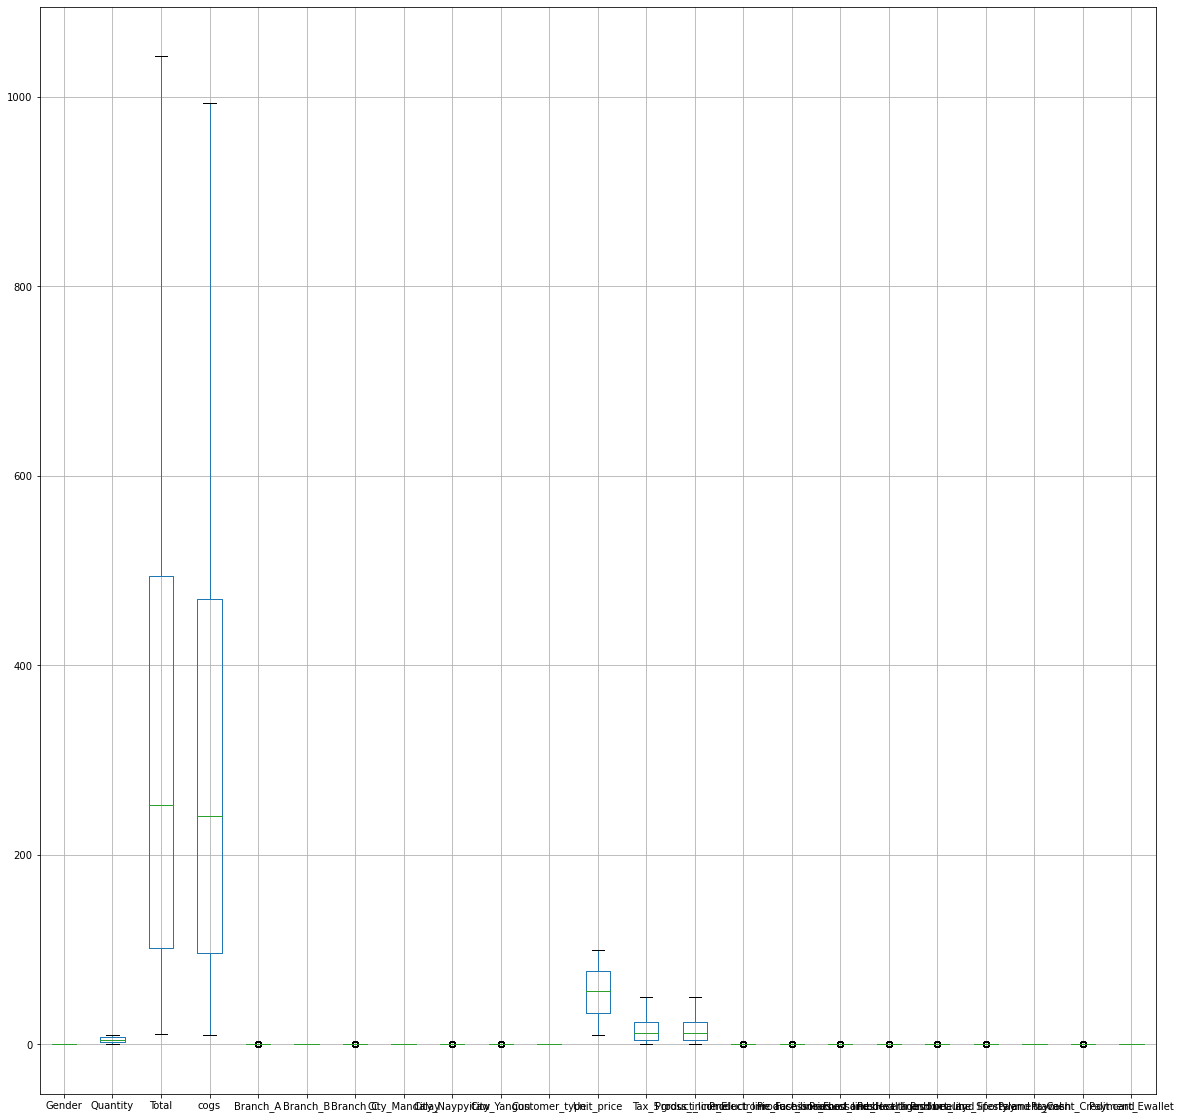

In [345]:
plt.figure(figsize=(20,20))
x.boxplot()

### Tax 5%

<AxesSubplot:xlabel='Tax_5'>

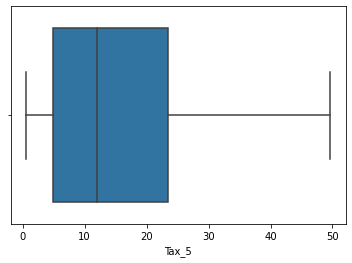

In [346]:
sns.boxplot(x['Tax_5'])

### Total

<AxesSubplot:xlabel='Total'>

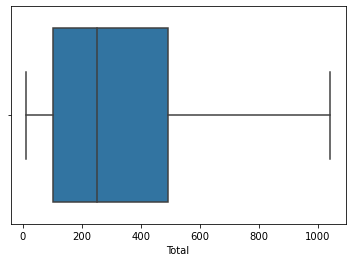

In [347]:
sns.boxplot(x['Total'])

### cogs

<AxesSubplot:xlabel='cogs'>

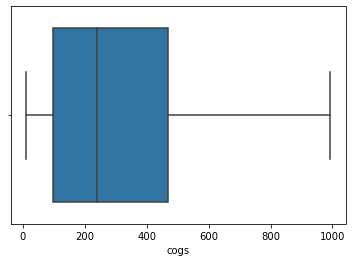

In [348]:
sns.boxplot(x['cogs'])

### gross income

<AxesSubplot:xlabel='gross_income'>

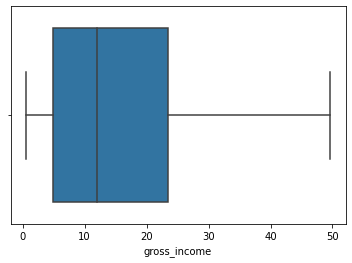

In [349]:
sns.boxplot(x['gross_income'])

In [350]:
# Create Instance
# preprocessing = DataPreProcessing()

In [351]:
# x = preprocessing.replace_outliers_by_nan(x,outlier_columns=['Tax 5%','Total','cogs','gross income'])

<AxesSubplot:>

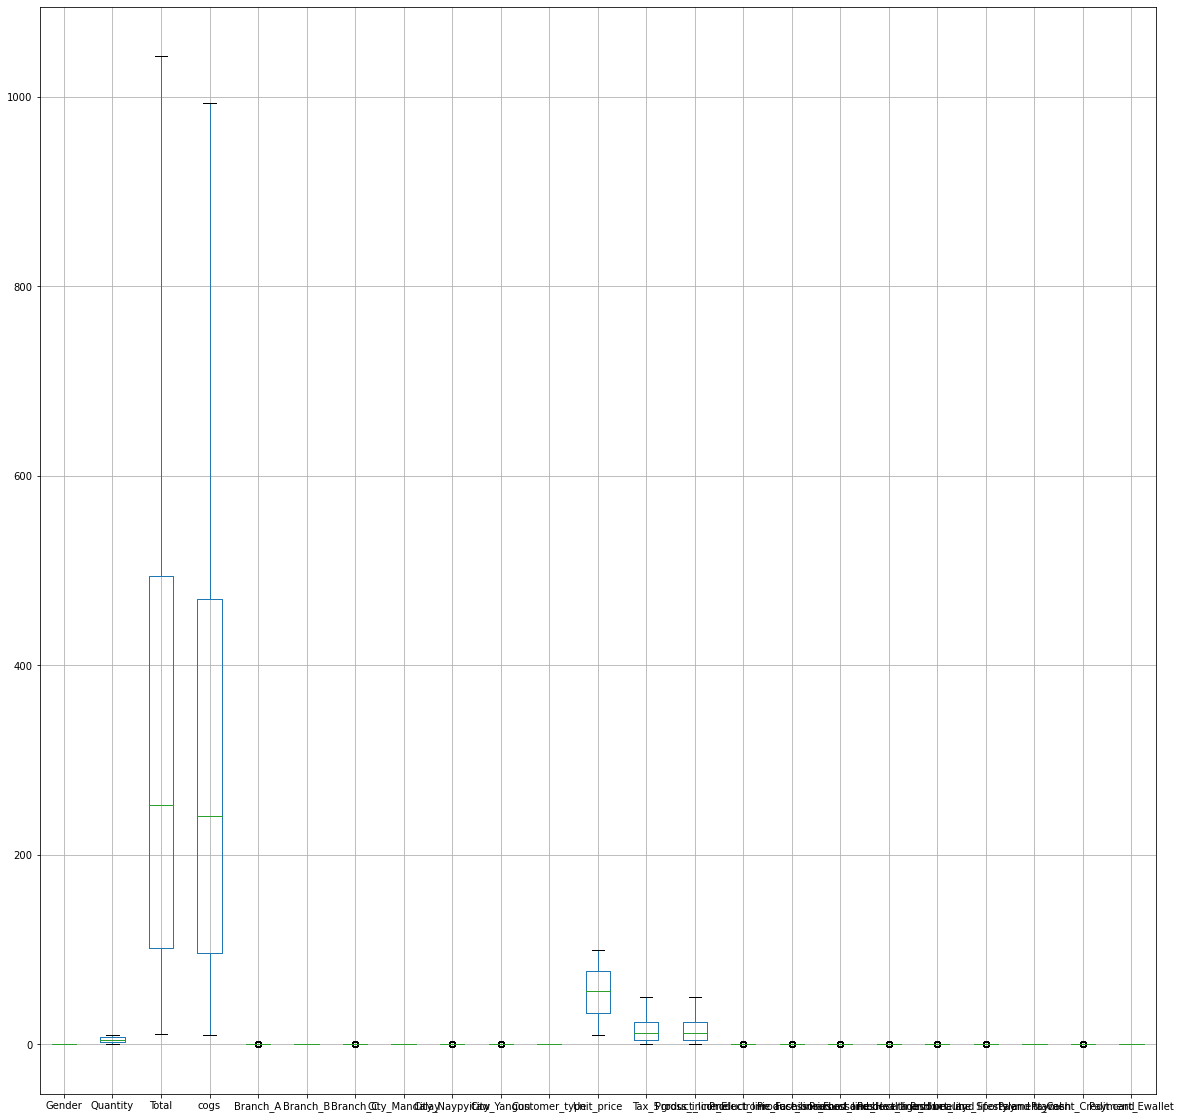

In [352]:
plt.figure(figsize=(20,20))
x.boxplot()

In [353]:
# x = preprocessing.knn_imputer(x,continuous_columns = ['Tax 5%','Total','cogs','gross income'])

In [354]:
# x.columns

# Feature Selection 

In [355]:
x.head(2)

,Gender,Quantity,Total,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,gross_income,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0,7,548.9715,522.83,1,0,0,0,0,1,...,26.1415,0,0,0,1,0,0,0,0,1
1,0,5,80.2200,76.40,0,0,1,0,1,0,...,3.8200,1,0,0,0,0,0,1,0,0


In [356]:
continuous_columns = ['Unit_price','Tax_5','Total','cogs','gross_income']
catogorical_columns = ['Customer_type', 'Gender','Quantity', 'Branch_A', 'Branch_B', 'Branch_C',
       'City_Mandalay', 'City_Naypyitaw', 'City_Yangon',
       'Product_line_Electronic accessories',
       'Product_line_Fashion accessories', 'Product_line_Food and beverages',
       'Product_line_Health and beauty', 'Product_line_Home and lifestyle',
       'Product_line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet']

### 0. correlation 

In [357]:
 pd.concat([x,y],axis=1).corr('kendall').tail(1)

,Gender,Quantity,Total,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating
Rating,0.26241,0.05163,0.00025,0.00025,0.22449,0.160249,0.263952,0.160249,0.263952,0.22449,...,0.17686,0.159738,0.202049,0.156215,0.133428,0.209023,0.194734,0.178355,0.194956,1.0


In [358]:
 pd.concat([x,y],axis=1).corr('spearman').tail(1)

,Gender,Quantity,Total,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating
Rating,0.26241,0.060243,0.000306,0.000306,0.22449,0.160249,0.263952,0.160249,0.263952,0.22449,...,0.17686,0.159738,0.202049,0.156215,0.133428,0.209023,0.194734,0.178355,0.194956,1.0


### 1. chi-square test

In [359]:
from sklearn.feature_selection import chi2

In [360]:
test_statistics, p_value = chi2(x[catogorical_columns],y)

In [361]:
pd.Series(p_value, index=catogorical_columns)

Customer_type                          7.697257e-04
Gender                                 6.265216e-17
Quantity                               1.585275e-03
Branch_A                               2.020491e-15
Branch_B                               1.785721e-08
Branch_C                               4.301896e-21
City_Mandalay                          1.785721e-08
City_Naypyitaw                         4.301896e-21
City_Yangon                            2.020491e-15
Product_line_Electronic accessories    1.335353e-11
Product_line_Fashion accessories       1.229538e-09
Product_line_Food and beverages        1.068354e-14
Product_line_Health and beauty         1.767700e-09
Product_line_Home and lifestyle        3.303143e-07
Product_line_Sports and travel         9.294052e-16
Payment_Cash                           1.160685e-11
Payment_Credit card                    2.003586e-10
Payment_Ewallet                        8.886839e-12
dtype: float64

## 2. ANOVA

In [362]:
from sklearn.feature_selection import f_classif

In [363]:
test_statistics, p_value = f_classif(x[continuous_columns],y)

In [364]:
pd.Series(p_value, index=continuous_columns)

Unit_price      0.548122
Tax_5           0.232295
Total           0.232295
cogs            0.232295
gross_income    0.232295
dtype: float64

### 3. Mutual information (Information Gain)

In [365]:
from sklearn.feature_selection import mutual_info_classif

In [366]:
array = mutual_info_classif(x,y,random_state = 10)

<AxesSubplot:>

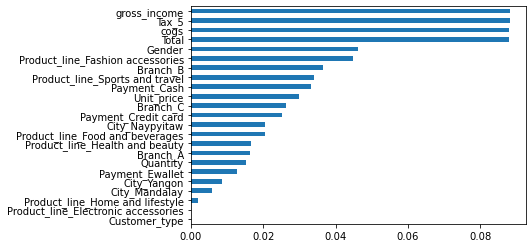

In [367]:
s2 = pd.Series(array, index=x.columns)
s2.sort_values().plot(kind= 'barh')

### 2.1 . Exhaustive Feature Selection

In [368]:
# pip install mlxtend

In [369]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [370]:
efs = ExhaustiveFeatureSelector(DecisionTreeClassifier(), min_features=19, max_features=20, cv=5, n_jobs=-1)
efs.fit(x,y)

Features: 10626/10626

ExhaustiveFeatureSelector(estimator=DecisionTreeClassifier(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14], [15], [16], [17], [18], [19],
                                          [20], [21], [22]],
                          max_features=20, min_features=19, n_jobs=-1)

In [371]:
pd.DataFrame(efs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6102719033232629, 0.8549848942598187, 0.842...",0.808809,"(Gender, Quantity, Total, cogs, Branch_A, Bran..."
1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.595166163141994, 0.8580060422960725, 0.8727...",0.811241,"(Gender, Quantity, Total, cogs, Branch_A, Bran..."
2,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5891238670694864, 0.8368580060422961, 0.884...",0.800954,"(Gender, Quantity, Total, cogs, Branch_A, Bran..."
3,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5891238670694864, 0.8429003021148036, 0.845...",0.798526,"(Gender, Quantity, Total, cogs, Branch_A, Bran..."
4,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6163141993957704, 0.8731117824773413, 0.860...",0.813037,"(Gender, Quantity, Total, cogs, Branch_A, Bran..."
...,...,...,...,...
10621,"(2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[0.5800604229607251, 0.8459214501510574, 0.860...",0.807015,"(Total, cogs, Branch_A, Branch_B, City_Mandala..."
10622,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[0.5740181268882175, 0.8459214501510574, 0.857...",0.803988,"(Total, cogs, Branch_A, Branch_C, City_Mandala..."
10623,"(2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[0.5770392749244713, 0.8459214501510574, 0.857...",0.80338,"(Total, cogs, Branch_B, Branch_C, City_Mandala..."
10624,"(2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[0.5770392749244713, 0.851963746223565, 0.8666...",0.805801,"(Total, Branch_A, Branch_B, Branch_C, City_Man..."


### 2.2 Recursive Feature Elimination

In [372]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier

# dt_model = DecisionTreeClassifier()

# rfe = RFE(dt_model, n_features_to_select=15)
# rfe.fit(x,y)
# x = x[rfe.get_feature_names_out()]

In [373]:
# df.Rating.value_counts()

In [374]:
# target_column = "Rating"
# x = df.drop(target_column,axis=1)
# y = df[target_column]

# # Create an instance
# smote = SMOTE(random_state=None, k_neighbors = 5, sampling_strategy=0.9)

# x , y = smote.fit_resample(x,y)  # 50:50
# y.value_counts()

In [375]:
# target_column = "Rating"
# x = df.drop(target_column,axis=1)
# y = df[target_column]


# x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)

# x_train

In [376]:
# y.value_counts()

In [377]:
# df[['Unit price','Quantity','Tax 5%','Total','cogs','gross income']]

In [378]:
# df

In [379]:
df = pd.concat([x,y],axis=1)
df

,Gender,Quantity,Total,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating
0,0,7,548.971500,522.830000,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,5,80.220000,76.400000,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,1,7,340.525500,324.310000,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,1,8,489.048000,465.760000,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,1,7,634.378500,604.170000,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0,4,404.908990,385.627609,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1648,1,1,52.518652,50.017764,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,0,4,99.362260,94.630724,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1650,0,8,808.622281,770.116458,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [380]:
# def svm_std_scalar(df):
#     df1 = df.copy()
    
#     x1 = ['Unit price','Quantity','Tax 5%','Total','cogs','gross income']
    
#     std_scalar = StandardScaler()
#     std_scalar.fit(df1[x1])
#     array = std_scalar.transform(df1[x1])
#     x = pd.DataFrame(array, columns=x1)
#     for i in x1:
#         df1[i] = x[i]
   
    
    
#     target_column = "Rating"
#     x = df1.drop(target_column,axis=1)
#     y = df1[target_column]

#     x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)
    
#     svm_std=SVC()
#     svm_std.fit(x_train,y_train)
#     model_details.append("SVM with Std Scaling")
#     #Testing Data
#     y_pred = svm_std.predict(x_test)
#     cnf_matrix = confusion_matrix(y_pred, y_test)
#     print("Confusion Matrix:\n",cnf_matrix)
#     accuracy = accuracy_score(y_pred, y_test)*100
#     print("Accuracy Score", accuracy)
#     Testing_accuracy.append(accuracy)
#     clf_report = classification_report(y_pred, y_test)
#     print("Classification report:\n",clf_report)
    
#     recall = recall_score(y_pred,y_test)*100
#     print("Recall :" ,recall)
#     Testing_Recall.append(recall)
    
#     precision = precision_score(y_pred,y_test)*100
#     print("Precision :",precision)
#     Testing_Precision.append(precision)
    
#     F1_score = f1_score(y_pred,y_test)*100
#     print("F1-Score :",F1_score)
#     Testing_F1_Score.append(F1_score)
    
#     print("@"*120)
#     #Training Data
#     y_pred_train = svm_std.predict(x_train)
#     cnf_matrix = confusion_matrix(y_pred_train, y_train)
#     print("Confusion Matrix:\n",cnf_matrix)
#     accuracy = accuracy_score(y_pred_train, y_train)*100
#     print("Accuracy Score", accuracy)
#     Training_accuracy.append(accuracy)
#     clf_report = classification_report(y_pred_train, y_train)
#     print("Classification report:\n",clf_report) 
# #     print(x_train)
# svm_std_scalar(df)


In [381]:
df

,Gender,Quantity,Total,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating
0,0,7,548.971500,522.830000,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,5,80.220000,76.400000,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,1,7,340.525500,324.310000,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,1,8,489.048000,465.760000,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,1,7,634.378500,604.170000,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0,4,404.908990,385.627609,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1648,1,1,52.518652,50.017764,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,0,4,99.362260,94.630724,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1650,0,8,808.622281,770.116458,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Evaluation 

************************************ SVM Classification *********************************************
Confusion Matrix:
 [[156 122]
 [ 92 126]]
*******************************************************
Accuracy Score: 56.85483870967742
*******************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59       278
           1       0.51      0.58      0.54       218

    accuracy                           0.57       496
   macro avg       0.57      0.57      0.57       496
weighted avg       0.58      0.57      0.57       496

Recall : 57.798165137614674
Precision : 50.806451612903224
F1-Score : 54.07725321888412
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Confusion Matrix:
 [[332 265]
 [246 313]]
*******************************************************
Accuracy Score: 55.79584775086506
******************

Confusion Matrix:
 [[523  73]
 [ 55 505]]
Accuracy Score 88.92733564013841
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       596
           1       0.87      0.90      0.89       560

    accuracy                           0.89      1156
   macro avg       0.89      0.89      0.89      1156
weighted avg       0.89      0.89      0.89      1156

************************************ K-Neighbours with normal scalar*********************************************
Confusion Matrix:
 [[213  41]
 [ 35 207]]
Accuracy Score 84.67741935483872
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       254
           1       0.83      0.86      0.84       242

    accuracy                           0.85       496
   macro avg       0.85      0.85      0.85       496
weighted avg       0.85      0.85      0.85       496

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Confusion Matrix:
 [[200   7]
 [ 48 241]]
Accuracy Score 88.91129032258065
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       207
           1       0.97      0.83      0.90       289

    accuracy                           0.89       496
   macro avg       0.89      0.90      0.89       496
weighted avg       0.90      0.89      0.89       496

Recall : 83.39100346020761
Precision : 97.17741935483872
F1-Score : 89.75791433891993
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Confusion Matrix:
 [[447  11]
 [131 567]]
Accuracy Score 87.71626297577855
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       458
           1       0.98      0.81      0.89       698

    accuracy                           0.88      1156
   macro avg       0.88      0.89      0.88      1

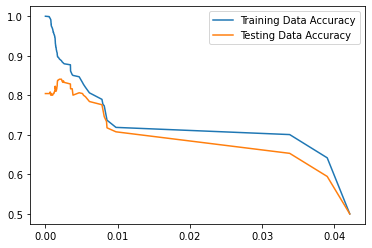

In [382]:
print("************************************ SVM Classification *********************************************")
def SVM_clf(x_test,y_test,x_train,y_train):
    svm_clf = SVC(random_state=5)
    svm_clf.fit(x_train, y_train)
    model_details.append("SVM Classification")
    # Testing Accuracy

    y_pred = svm_clf.predict(x_test)

    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n", cnf_matrix)
    print("*"*55)

    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score:",accuracy)
    print("*"*55)

    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n", clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    print("@"*120)
    # Training Accuracy

    y_pred_train = svm_clf.predict(x_train)

    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n", cnf_matrix)
    print("*"*55)

    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score:",accuracy)
    print("*"*55)
    Training_accuracy.append(accuracy)

    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n", clf_report)
SVM_clf(x_test,y_test,x_train,y_train)  


print("************************************ SVM with Hyperparameter  *********************************************")  

def SVM_clf_hyp(df):
    
    df1 = df.copy()
    
    x1 = ['Unit_price','Quantity','Tax_5','Total','cogs','gross_income']
    
    std_scalar = StandardScaler()
    std_scalar.fit(df1[x1])
    array = std_scalar.transform(df1[x1])
    x = pd.DataFrame(array, columns=x1)
    for i in x1:
        df1[i] = x[i]
   
    
    
    target_column = "Rating"
    x = df1.drop(target_column,axis=1)
    y = df1[target_column]

    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)
    
    
    svm_clf_hyp = SVC(random_state=5)
    model_details.append("SVM with Hyperparameter")
    
    hyperparameters = {"C":np.arange(1,2),
                      "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}

    gscv_svm = GridSearchCV(svm_clf_hyp, hyperparameters, cv=5)
    gscv_svm.fit(x_train, y_train)
    gscv_svm.best_estimator_

    svm_clf = gscv_svm.best_estimator_
    svm_clf.fit(x_train, y_train)

    # Testing Accuracy

    y_pred = svm_clf.predict(x_test)

    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n", cnf_matrix)
    print("*"*55)

    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score:",accuracy)
    print("*"*55)

    Testing_accuracy.append(accuracy)
    
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n", clf_report)

    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    print("@"*120)
    # Training Accuracy

    y_pred_train = svm_clf.predict(x_train)

    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n", cnf_matrix)
    print("*"*55)

    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score:",accuracy)
    print("*"*55)
    Training_accuracy.append(accuracy)

    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n", clf_report)
SVM_clf_hyp(df)

print("************************************ SVM with Standard scalar*********************************************")
def svm_std_scalar(df):
    
       
    df1 = df.copy()
    
    x1 = ['Unit_price','Quantity','Tax_5','Total','cogs','gross_income']
    
    std_scalar = StandardScaler()
    std_scalar.fit(df1[x1])
    array = std_scalar.transform(df1[x1])
    x = pd.DataFrame(array, columns=x1)
    for i in x1:
        df1[i] = x[i]
   
    
    
    target_column = "Rating"
    x = df1.drop(target_column,axis=1)
    y = df1[target_column]

    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)
    
    svm_std=SVC()
    svm_std.fit(x_train,y_train)
    model_details.append("SVM with Std Scaling")
    #Testing Data
    y_pred = svm_std.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    print("@"*120)
    #Training Data
    y_pred_train = svm_std.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
svm_std_scalar(df)

print("************************************ SVM with normal scalar*********************************************")


def svm_MinMax_scalar(df):
        
    df1 = df.copy()
    
    x1 = ['Unit_price','Quantity','Tax_5','Total','cogs','gross_income']
    
    normal_scalar = MinMaxScaler()
    normal_scalar.fit(df1[x1])
    array = normal_scalar.transform(df1[x1])
    x = pd.DataFrame(array, columns=x1)
    for i in x1:
        df1[i] = x[i]
   
    
    
    target_column = "Rating"
    x = df1.drop(target_column,axis=1)
    y = df1[target_column]

    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)
    
    svm_normal = SVC(random_state=5)
    svm_normal.fit(x_train,y_train)
    model_details.append("SVM with Normal Scaling")
    #Testing Data
    y_pred = svm_normal.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    print("@"*120)
    #Training Data
    y_pred_train = svm_normal.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
svm_MinMax_scalar(df)


print("************************************ Logistic Regression*********************************************")
def LOG_model(x_test,y_test,x_train,y_train):
    lr_model=LogisticRegression(random_state=5)
    lr_model.fit(x_train,y_train)
    model_details.append("Logistic Regression")
    #Testing Data
    y_pred = lr_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    print("@"*120)
    #Training Data
    y_pred_train = lr_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)      
LOG_model(x_test,y_test,x_train,y_train)

print("************************************ K-Neighbours Regression*********************************************")

def KNN_model1(x_test,y_test,x_train,y_train):
    knn_model=KNeighborsClassifier()
    knn_model.fit(x_train,y_train)
    model_details.append("K-Neighbours Classification Without Scaling")
    #Testing Data
    y_pred = knn_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    print("@"*120)
    #Training Data
    y_pred_train = knn_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
KNN_model1(x_test,y_test,x_train,y_train)

print("************************************ K-Neighbours with std scalar *********************************************")

    
def knn_std_scalar(df):
    df1 = df.copy()
    
    x1 = ['Unit_price','Quantity','Tax_5','Total','cogs','gross_income']
    
    std_scalar = StandardScaler()
    std_scalar.fit(df1[x1])
    array = std_scalar.transform(df1[x1])
    x = pd.DataFrame(array, columns=x1)
    for i in x1:
        df1[i] = x[i]
   
    
    
    target_column = "Rating"
    x = df1.drop(target_column,axis=1)
    y = df1[target_column]

    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)
    
    knn_model_std = KNeighborsClassifier()
    knn_model_std.fit(x_train,y_train)
    model_details.append("KNN with Std Scaling")
    #Testing Data
    y_pred = knn_model_std.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    print("@"*120)
    #Training Data
    y_pred_train = knn_model_std.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
knn_std_scalar(df)

print("************************************ K-Neighbours with normal scalar*********************************************")


def knn_MinMax_scalar(df):
    df1 = df.copy()
    
    x1 = ['Unit_price','Quantity','Tax_5','Total','cogs','gross_income']
    
    normal_scalar = MinMaxScaler()
    normal_scalar.fit(df1[x1])
    array = normal_scalar.transform(df1[x1])
    x = pd.DataFrame(array, columns=x1)
    for i in x1:
        df1[i] = x[i]
   
    
    
    target_column = "Rating"
    x = df1.drop(target_column,axis=1)
    y = df1[target_column]

    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)
    
    knn_model_normal = KNeighborsClassifier()
    knn_model_normal.fit(x_train,y_train)
    model_details.append("KNN with Normal Scaling")
    #Testing Data
    y_pred = knn_model_normal.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    print("@"*120)
    
    #Training Data
    y_pred_train = knn_model_normal.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
knn_MinMax_scalar(df)

print("************************************** KNN-HyperParameter Tuning  **********************************************")

def hyper_parameter_knn(df):
    df1 = df.copy()
    
    x1 = ['Unit_price','Quantity','Tax_5','Total','cogs','gross_income']
    
    std_scalar = StandardScaler()
    std_scalar.fit(df1[x1])
    array = std_scalar.transform(df1[x1])
    x = pd.DataFrame(array, columns=x1)
    for i in x1:
        df1[i] = x[i]
   
    
    
    target_column = "Rating"
    x = df1.drop(target_column,axis=1)
    y = df1[target_column]

    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)
    
    knn_clf=KNeighborsClassifier()        # estimator
    hyperparameters = {"n_neighbors" : np.arange(3,30),
                      "p": [1,2]}                                              # param-grid
    gscv_knn_clf =GridSearchCV(knn_clf,hyperparameters,cv=5)
    gscv_knn_clf.fit(x_train,y_train)
    gscv_knn_clf.best_estimator_
    gscv_knn_clf.best_params_
    model_details.append("KNN-Hyperparameter_Tunning")

    #testing_accuracy
    y_pred = gscv_knn_clf.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    
    Testing_accuracy.append(accuracy)
    
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    print("@"*120)
    
    #training_accuracy
    y_pred_train = gscv_knn_clf.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)

    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
hyper_parameter_knn(df) 

print("************************************ Decision-Tree Regression*********************************************")

def tree_model(x_test,y_test,x_train,y_train):
    dt_model=DecisionTreeClassifier(random_state=5)
    dt_model.fit(x_train,y_train)
    model_details.append("Decision-Tree Regression")
    #Testing Data
    y_pred = dt_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    print("@"*120)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    print("@"*120)
    #Training Data
    y_pred_train = dt_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
tree_model(x_test,y_test,x_train,y_train)

print("************************************** Pre_prunning Decision Tree  **********************************************")

def pre_pruning(x_train,y_train,x_test,y_test):
    dt_clf = DecisionTreeClassifier(random_state=5)

    hyperparameter = {"criterion":['gini', 'entropy'],
    'max_depth':np.arange(3,8),
    'min_samples_split': np.arange(2,8),
    'min_samples_leaf':np.arange(5,7)}

    gscv_dt_clf_model = GridSearchCV(dt_clf, hyperparameter, cv = 5)
    gscv_dt_clf_model.fit(x_train, y_train)

    dt_clf_hp_model = gscv_dt_clf_model.best_estimator_
    dt_clf_hp_model.fit(x_train, y_train)
    model_details.append("Pre-Pruning DT Classifier")
    # Testing data
    y_pred = dt_clf_hp_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n",cnf_matrix)

    print("*"*45)
    accuracy = accuracy_score(y_test, y_pred)*100
    print("Accuracy Score:",accuracy)
    print("*"*45)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_test, y_pred)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("*"*90)

    # Training data

    # prediction
    y_pred_train = dt_clf_hp_model.predict(x_train)

    cnf_matrix = confusion_matrix(y_train, y_pred_train)
    print("Confusion Matrix:\n",cnf_matrix)

    print("*"*45)
    accuracy = accuracy_score(y_train, y_pred_train)*100
    print("Accuracy Score:",accuracy)
    print("*"*45)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_train, y_pred_train)
    print("Classification report:\n",clf_report)
      
pre_pruning(x_train,y_train,x_test,y_test)

print("**************************************  Post Pruning-CCP Alpha DT **********************************************")
def post_pruning(x_train,y_train,x_test,y_test):
    decision_tree = DecisionTreeClassifier(random_state=5)
    decision_tree.fit(x_train, y_train)
    result = decision_tree.cost_complexity_pruning_path(x_train, y_train)
    ccp_alpha_list = result['ccp_alphas']
    # ccp_alpha_list
    train_accuracy_list = []
    test_accuracy_list = []

    for i in ccp_alpha_list:
        decision_tree = DecisionTreeClassifier(ccp_alpha= i,random_state=7)
        decision_tree.fit(x_train, y_train)
    
        training_accuracy = decision_tree.score(x_train, y_train)
        train_accuracy_list.append(training_accuracy)
    
        testing_Accuracy = decision_tree.score(x_test, y_test)
        test_accuracy_list.append(testing_Accuracy)
    
   
    fig, ax = plt.subplots()
    ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
    ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
    ax.legend()
    index_ccp = test_accuracy_list.index(max(test_accuracy_list))
    best_ccp = ccp_alpha_list[index_ccp]
    decision_tree = DecisionTreeClassifier(ccp_alpha= best_ccp,random_state=7)
    decision_tree.fit(x_train, y_train)
    model_details.append("Post-Pruning DT Classifier")
    
    y_pred = decision_tree.predict(x_test)
    y_pred_train = decision_tree.predict(x_train)
    #Testing Accuracy
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("@"*120)
    #Training Accuracy
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report) 
    
    
post_pruning(x_train,y_train,x_test,y_test)




print("************************************ Random- Forest  Regression*********************************************")

def forest_model(x_test,y_test,x_train,y_train):
    rf_model=RandomForestClassifier(random_state=5)
    rf_model.fit(x_train,y_train)
    model_details.append("Random- Forest  Regression")
    #Testing Data
    y_pred = rf_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("@"*120)
    #Training Data
    y_pred_train = rf_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
forest_model(x_test,y_test,x_train,y_train)

print("**************************************  Hyper-parameter Random-Forest **********************************************")

def Hyper_parameter_Random_Forest(x_train,y_train,x_test,y_test):
    rf_model = RandomForestClassifier(random_state=5)
    model_details.append("Random Forest with hyperparameter")
    hyperparameter = {"n_estimators":np.arange(99,102),
                     "criterion":['gini','entropy'],
                     'max_depth':np.arange(3,5),
                     'min_samples_split': np.arange(5,7),
                     'min_samples_leaf':np.arange(7,8),
                     'max_features':['sqrt','log2'] }

    gscv_rf_model = GridSearchCV(rf_model, hyperparameter, cv=5)
    gscv_rf_model.fit(x_train,y_train)
    y_pred = gscv_rf_model.predict(x_test)
    y_pred_train = gscv_rf_model.predict(x_train)
    #testing_accuracy
    
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    
    Testing_accuracy.append(accuracy)
    
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("@"*120)
    #training_accuracy
    
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)

    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)   

Hyper_parameter_Random_Forest(x_train,y_train,x_test,y_test)





print("************************************ ADA-Boost  Classifier *********************************************")

def boost_model(x_test,y_test,x_train,y_train):
    ada_model=AdaBoostClassifier(random_state=5)
    ada_model.fit(x_train,y_train)
    model_details.append("ADA-Boost  Classifier")
    #Testing Data
    y_pred = ada_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("@"*120)
    #Training Data
    y_pred_train = ada_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
boost_model(x_test,y_test,x_train,y_train)

print("**************************************  Hyper-parameter ADA-BOOST **********************************************")

def Hyper_parameter_ada_boost(x_train,y_train,x_test,y_test):
    ada_model = AdaBoostClassifier(random_state=5)

    hyperparameter = {"n_estimators":np.arange(49,52),
                        "learning_rate":np.arange(0, 2, 0.05)}
    model_details.append("Hyper-parameter ADA-BOOST")
    gscv_clf_ab = GridSearchCV(ada_model, hyperparameter, cv=5)
    gscv_clf_ab.fit(x_train, y_train)
    gscv_clf_ab.best_estimator_
    ada_model = gscv_clf_ab.best_estimator_
    ada_model.fit(x_train, y_train)
    y_pred = gscv_clf_ab.predict(x_test)
    y_pred_train = gscv_clf_ab.predict(x_train)
    #testing_accuracy
    
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    
    Testing_accuracy.append(accuracy)
    
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("@"*120)
    #training_accuracy
    
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)

    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)   

Hyper_parameter_ada_boost(x_train,y_train,x_test,y_test)


print("************************************ Naive-Bayes  Classifier *********************************************")

def bayes_model(x_test,y_test,x_train,y_train):
    nb_model=GaussianNB()
    nb_model.fit(x_train,y_train)
    model_details.append(" Gaussian Naive-Bayes  Classifier")
    #Testing Data
    y_pred = nb_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("@"*120)
    #Training Data
    y_pred_train = nb_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
bayes_model(x_test,y_test,x_train,y_train)



# print("**************************************  Multinomial Naive-Bayes  Classifier **********************************************")
# def multi_bayes_model(x_test,y_test,x_train,y_train):
#     mn_model=MultinomialNB()
#     mn_model.fit(x_train,y_train)
#     model_details.append(" Multinomial Naive-Bayes  Classifier")
#     #Testing Data
#     y_pred = mn_model.predict(x_test)
#     cnf_matrix = confusion_matrix(y_pred, y_test)
#     print("Confusion Matrix:\n",cnf_matrix)
#     accuracy = accuracy_score(y_pred, y_test)*100
#     print("Accuracy Score", accuracy)
#     Testing_accuracy.append(accuracy)
#     clf_report = classification_report(y_pred, y_test)
#     print("Classification report:\n",clf_report)
#     print("@"*120)
#     #Training Data
#     y_pred_train = mn_model.predict(x_train)
#     cnf_matrix = confusion_matrix(y_pred_train, y_train)
#     print("Confusion Matrix:\n",cnf_matrix)
#     accuracy = accuracy_score(y_pred_train, y_train)*100
#     print("Accuracy Score", accuracy)
#     Training_accuracy.append(accuracy)
#     clf_report = classification_report(y_pred_train, y_train)
#     print("Classification report:\n",clf_report)    
# multi_bayes_model(x_test,y_test,x_train,y_train)


print("**************************************  Bernoulli Naive-Bayes  Classifier **********************************************")
def Bernoulli_bayes_model(x_test,y_test,x_train,y_train):
    bern_model=BernoulliNB()
    bern_model.fit(x_train,y_train)
    model_details.append(" Bernoulli Naive-Bayes  Classifier")
    #Testing Data
    y_pred = bern_model.predict(x_test)
    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred, y_test)*100
    print("Accuracy Score", accuracy)
    Testing_accuracy.append(accuracy)
    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)
    
    recall = recall_score(y_pred,y_test)*100
    print("Recall :" ,recall)
    Testing_Recall.append(recall)
    
    precision = precision_score(y_pred,y_test)*100
    print("Precision :",precision)
    Testing_Precision.append(precision)
    
    F1_score = f1_score(y_pred,y_test)*100
    print("F1-Score :",F1_score)
    Testing_F1_Score.append(F1_score)
    
    
    print("@"*120)
    #Training Data
    y_pred_train = bern_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)
    accuracy = accuracy_score(y_pred_train, y_train)*100
    print("Accuracy Score", accuracy)
    Training_accuracy.append(accuracy)
    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)    
Bernoulli_bayes_model(x_test,y_test,x_train,y_train)




In [383]:
print("model_details---->\n",model_details) 
print("~"*125)
print("Testing_accuracy----->\n",Testing_accuracy) 
print("~"*125)
print("Training_accuracy----->\n",Training_accuracy) 
print("~"*125)
print("Testing_Recall------>\n",Testing_Recall) 
print("~"*125)
print("Testing_Precision------>\n",Testing_Precision) 
print("~"*125)
print("Testing_F1_Score----->\n",Testing_F1_Score) 
print("~"*125)
 
print(len(model_details))
print(len(Testing_accuracy))
print(len(Training_accuracy)) 
print(len(Testing_Recall))
print(len(Testing_Precision))
print(len(Testing_F1_Score)) 

model_details---->
 ['SVM Classification', 'SVM with Hyperparameter', 'SVM with Std Scaling', 'SVM with Normal Scaling', 'Logistic Regression', 'K-Neighbours Classification Without Scaling', 'KNN with Std Scaling', 'KNN with Normal Scaling', 'KNN-Hyperparameter_Tunning', 'Decision-Tree Regression', 'Pre-Pruning DT Classifier', 'Post-Pruning DT Classifier', 'Random- Forest  Regression', 'Random Forest with hyperparameter', 'ADA-Boost  Classifier', 'Hyper-parameter ADA-BOOST', ' Gaussian Naive-Bayes  Classifier', ' Bernoulli Naive-Bayes  Classifier']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Testing_accuracy----->
 [56.85483870967742, 89.51612903225806, 88.10483870967742, 89.51612903225806, 87.09677419354838, 66.73387096774194, 80.44354838709677, 84.67741935483872, 81.04838709677419, 79.23387096774194, 77.01612903225806, 84.07258064516128, 87.29838709677419, 80.44354838709677, 88.91129032258065, 88.104838

In [384]:
Difference_Df=pd.DataFrame({"Model_Details":model_details,
               "Testing_Accuracy":Testing_accuracy,
               "Training_Accuracy":Training_accuracy,
                "Testing_Recall":Testing_Recall,
                "Testing_Precision":Testing_Precision,
                "Testing_F1_Score":Testing_F1_Score})

In [385]:
Difference_Df

,Model_Details,Testing_Accuracy,Training_Accuracy,Testing_Recall,Testing_Precision,Testing_F1_Score
0,SVM Classification,56.854839,55.795848,57.798165,50.806452,54.077253
1,SVM with Hyperparameter,89.516129,88.235294,82.666667,100.000000,90.510949
2,SVM with Std Scaling,88.104839,87.543253,81.188119,99.193548,89.292196
3,SVM with Normal Scaling,89.516129,88.581315,83.108108,99.193548,90.441176
4,Logistic Regression,87.096774,87.629758,79.487179,100.000000,88.571429
5,K-Neighbours Classification Without Scaling,66.733871,77.768166,70.243902,58.064516,63.576159
6,KNN with Std Scaling,80.443548,88.927336,86.829268,71.774194,78.587196
7,KNN with Normal Scaling,84.677419,90.224913,85.537190,83.467742,84.489796
8,KNN-Hyperparameter_Tunning,81.048387,91.003460,87.378641,72.580645,79.295154
9,Decision-Tree Regression,79.233871,100.000000,83.410138,72.983871,77.849462


# Testing on single row

In [386]:
column_names = x.columns
len(column_names)
column_names

Index(['Gender', 'Quantity', 'Total', 'cogs', 'Branch_A', 'Branch_B',
       'Branch_C', 'City_Mandalay', 'City_Naypyitaw', 'City_Yangon',
       'Customer_type', 'Unit_price', 'Tax_5', 'gross_income',
       'Product_line_Electronic accessories',
       'Product_line_Fashion accessories', 'Product_line_Food and beverages',
       'Product_line_Health and beauty', 'Product_line_Home and lifestyle',
       'Product_line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [387]:
one_hot_encoded_column = ["Branch","City","Product_line","Payment"]
label_encoded_column = ["Customer_type","Gender"]

In [388]:
values_Customer_type

{'Normal': 0, 'Member': 1}

In [389]:
values_Gender

{'Female': 0, 'Male': 1}

In [390]:
x.head(1).T

,0
Gender,0.0000
Quantity,7.0000
Total,548.9715
cogs,522.8300
Branch_A,1.0000
Branch_B,0.0000
Branch_C,0.0000
City_Mandalay,0.0000
City_Naypyitaw,0.0000
City_Yangon,1.0000


In [391]:
Gender = 'Male'
Quantity = 7.0000
Total = 548.9715
cogs = 522.8300



Customer_type = 'Normal'
Unit_price = 74.6900
Tax_5 = 26.1415
gross_income = 26.1415

# one hot encodded column 
Product_line = "Electronic accessories"
Payment = "Ewallet"
Branch = "A"
City = "Yangon"

In [392]:
## Define column name
Product_line_col = "Product_line_" + Product_line
Payment_col = "Payment_" + Payment 
Branch_col = "Branch_" + Branch
City_col = "City_" + City

print(Product_line_col)
print(Payment_col)
print(Branch_col)
print(City_col)

Product_line_Electronic accessories
Payment_Ewallet
Branch_A
City_Yangon


In [393]:
Product_line_index = np.where (column_names == Product_line_col)[0][0]
Payment_index = np.where(column_names == Payment_col)[0][0]
Branch_index = np.where(column_names == Branch_col)[0][0]
City_index = np.where(column_names == City_col)[0][0]

print(Product_line_index)
print(Payment_index)
print(Branch_index)
print(City_index)

14
22
4
9


In [415]:
array = np.zeros(len(column_names),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [416]:
column_names

Index(['Gender', 'Quantity', 'Total', 'cogs', 'Branch_A', 'Branch_B',
       'Branch_C', 'City_Mandalay', 'City_Naypyitaw', 'City_Yangon',
       'Customer_type', 'Unit_price', 'Tax_5', 'gross_income',
       'Product_line_Electronic accessories',
       'Product_line_Fashion accessories', 'Product_line_Food and beverages',
       'Product_line_Health and beauty', 'Product_line_Home and lifestyle',
       'Product_line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [417]:
array[0] = values_Customer_type[Customer_type]
array[1] = values_Gender[Gender]
array[2] = Unit_price
array[3] = Quantity
array[4] = Tax_5
array[5] = Total
array[6] = cogs
array[7] = gross_income



array[Product_line_index] = 1
array[Payment_index] = 1
array[Branch_index] = 1
array[City_index] = 1

array
len(array)

23

# Best accuracy model 

In [418]:
# def svm_MinMax_scalar(df):
        
df1 = df.copy()

x1 = ['Unit_price','Quantity','Tax_5','Total','cogs','gross_income']

normal_scalar = MinMaxScaler()
normal_scalar.fit(df1[x1])
array1 = normal_scalar.transform(df1[x1])
x = pd.DataFrame(array1, columns=x1)
for i in x1:
    df1[i] = x[i]



target_column = "Rating"
x = df1.drop(target_column,axis=1)
y = df1[target_column]

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=10, stratify=y)

svm_normal = SVC(random_state=5)
svm_normal.fit(x_train,y_train)
#     model_details.append("SVM with Normal Scaling")
#Testing Data
y_pred = svm_normal.predict(x_test)
cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:\n",cnf_matrix)
accuracy = accuracy_score(y_pred, y_test)*100
print("Accuracy Score", accuracy)
#     Testing_accuracy.append(accuracy)
clf_report = classification_report(y_pred, y_test)
print("Classification report:\n",clf_report)
print("@"*120)

recall = recall_score(y_pred,y_test)*100
print("Recall :" ,recall)
#     Testing_Recall.append(recall)

precision = precision_score(y_pred,y_test)*100
print("Precision :",precision)
#     Testing_Precision.append(precision)

F1_score = f1_score(y_pred,y_test)*100
print("F1-Score :",F1_score)
#     Testing_F1_Score.append(F1_score)

print("@"*120)
#Training Data
y_pred_train = svm_normal.predict(x_train)
cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix:\n",cnf_matrix)
accuracy = accuracy_score(y_pred_train, y_train)*100
print("Accuracy Score", accuracy)
#     Training_accuracy.append(accuracy)
clf_report = classification_report(y_pred_train, y_train)
print("Classification report:\n",clf_report)    
# svm_MinMax_scalar(df)



Confusion Matrix:
 [[198   2]
 [ 50 246]]
Accuracy Score 89.51612903225806
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       200
           1       0.99      0.83      0.90       296

    accuracy                           0.90       496
   macro avg       0.90      0.91      0.89       496
weighted avg       0.91      0.90      0.90       496

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Recall : 83.1081081081081
Precision : 99.19354838709677
F1-Score : 90.44117647058823
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Confusion Matrix:
 [[446   0]
 [132 578]]
Accuracy Score 88.58131487889274
Classification report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       446
           1       1.00      0.81      

In [422]:
prediction = svm_normal.predict([array])[0]
print(prediction)
if prediction == 1:
    print("Customer is satisfied ")
else:

1


In [420]:
# len(array)

In [401]:
column_dict = {"Customer_type":Customer_type,
              "Gender":Gender,
              "column_name":list(column_names)}
column_dict

{'Customer_type': 'Normal',
 'Gender': 'Male',
 'column_name': ['Gender',
  'Quantity',
  'Total',
  'cogs',
  'Branch_A',
  'Branch_B',
  'Branch_C',
  'City_Mandalay',
  'City_Naypyitaw',
  'City_Yangon',
  'Customer_type',
  'Unit_price',
  'Tax_5',
  'gross_income',
  'Product_line_Electronic accessories',
  'Product_line_Fashion accessories',
  'Product_line_Food and beverages',
  'Product_line_Health and beauty',
  'Product_line_Home and lifestyle',
  'Product_line_Sports and travel',
  'Payment_Cash',
  'Payment_Credit card',
  'Payment_Ewallet']}

In [ ]:
import json

with open("column_dict.json", "w") as f:
    json.dump(column_dict, f)

In [ ]:
# Save Model in Pickle File
import pickle

with open("svm_normal.pkl", "wb") as f:
    pickle.dump(svm_normal, f)